# **Perk A/B Testing Framework: Manual vs ML vs Random Assignment**


## Executive Summary: Perk A/B Testing

This notebook evaluates three perk assignment strategies for TravelTide users:

- **Group A (Manual)**: Rule-based segmentation  
- **Group B (ML)**: K-Means clustering segmentation  
- **Group C (Random)**: Control group with random perks  

###  Key Business Questions
- Which strategy drives **higher subscription rates**?  
- Do perks influence **spending behavior**?  
- How do different assignments affect **user engagement**?  

###  Approach
- Users are split into balanced test groups.  
- Outcomes (subscription, spending, engagement) are **simulated for demonstration** but can be replaced with real data.  
- Multiple statistical tests (Chi-Square, Fisher’s Exact, t-tests, Mann-Whitney U, KS, Anderson-Darling) validate differences.  
- Visualizations highlight group-level performance.  
- Results are compiled into a **stakeholder-ready report** with metrics, plots, and interpretations.  

###  Expected Insights
- Clear comparison of **manual vs ML vs random assignment**.  
- Identification of **statistically significant differences** in subscription, spending, and engagement.  
- Actionable guidance for **perk strategy optimization**.  







In [7]:
import os
import sys
# --- Setup ---
%load_ext autoreload
%autoreload 2
%matplotlib inline

bad_paths = [
    "/Users/guykaptue/my_work_spaces/machine learning",
    "/Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/src"
]
sys.path = [p for p in sys.path if os.path.abspath(p) not in bad_paths]

print("Clean sys.path:")
for p in sys.path:
    print(" -", p)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Clean sys.path:
 - /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project
 - /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project
 - /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project
 - /opt/anaconda3/envs/ml311/lib/python311.zip
 - /opt/anaconda3/envs/ml311/lib/python3.11
 - /opt/anaconda3/envs/ml311/lib/python3.11/lib-dynload
 - 
 - /opt/anaconda3/envs/ml311/lib/python3.11/site-packages
 - __editable__.tts_mastery_project-0.1.0.finder.__path_hook__


In [8]:
import pandas as pd  # noqa: F401
import numpy as np  # noqa: F401
from IPython.display import display

# ------------------------------------------------------------
# 1️⃣ Determine project root dynamically
# - Works even if notebook is in a subfolder of notebooks/
# ------------------------------------------------------------
cwd = os.getcwd()
print("Current working directory:", cwd)

# Project root = traveltide_project folder
# Assumes notebooks/ is directly under traveltide_project/
# Project root
project_root = os.path.abspath(os.path.join(cwd, "../.."))
print("Project root:", project_root)



## ------------------------------------------------------------
# 2️⃣ Add project root to sys.path for imports
# ------------------------------------------------------------
# Add project root to sys.path
if project_root not in sys.path:
    sys.path.insert(0, project_root)



print("Project root added to sys.path:", project_root)

print(sys.path)  # Ensure /traveltide_project is included

# Check if src exists
print(os.path.exists(os.path.join(project_root, "src")))



Current working directory: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/notebooks/tests
Project root: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project
Project root added to sys.path: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project
['/Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project', '/Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project', '/Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project', '/opt/anaconda3/envs/ml311/lib/python311.zip', '/opt/anaconda3/envs/ml311/lib/python3.11', '/opt/anaconda3/envs/ml311/lib/python3.11/lib-dynload', '', '/opt/anaconda3/envs/ml311/lib/python3.11/site-packages', '__editable__.tts_mastery_project-0.1.0.finder.__path_hook__']
True


In [9]:
# Verify that src is importable
try:
    import src
    print("✅ src module found at:", src.__file__)
except ModuleNotFoundError:
    print("❌ src module not found. Check your sys.path!")
    


✅ src module found at: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/src/__init__.py


In [10]:
from src.core import (
    DataLoader, # noqa: F401 
    ABTestFramework
)


  

In [11]:
loader = DataLoader()
users=loader.load_table(data_type='feature', table_name='user_base')
kmeans_segmentation=loader.load_table(data_type='kmeans', table_name='kmeans_segmentation')
customer_segmentation=loader.load_table(data_type='non_ml', table_name='customer_segmentation_detailed')


✅ Verbindung zur PostgreSQL-Datenbank hergestellt.
📁 Lade Tabelle 'user_base' aus CSV: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/data/csv/processed/features/user_base.csv
✅ CSV geladen. Zeilen: 5998
📁 Lade Tabelle 'kmeans_segmentation' aus CSV: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/data/csv/processed/segment/ml_model/kmeans/kmeans_segmentation.csv
✅ CSV geladen. Zeilen: 5998
📁 Lade Tabelle 'customer_segmentation_detailed' aus CSV: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/data/csv/processed/segment/non_ml/customer_segmentation_detailed.csv
✅ CSV geladen. Zeilen: 5998


In [12]:
tester = ABTestFramework(
     manual_segmentation=customer_segmentation,
     ml_segmentation=kmeans_segmentation
)

✅ ABTestFramework initialized
   Manual segmentation: 5,998 users
   ML segmentation: 5,998 users
   Test ratio: 33% per group



🚀 Running complete A/B test analysis...

[SETUP] Creating test groups...
   Common users: 5,998

   ✅ Test groups created:
      Group A (Manual): 1,979 users
      Group B (ML): 1,979 users
      Group C (Random): 1,979 users
[SIMULATION] Generating outcome data...
   ⚠️ This is simulated data for demonstration
   ⚠️ Replace with actual user behavior in production
   ✅ Simulated outcomes added to test groups

[REPORT] Generating comprehensive A/B test report...
[TEST] Running Chi-Square test on subscription rates...
   ✅ Chi-Square test completed
      Chi2: 66.308, p-value: 0.0000
      Interpretation: Significant difference
[TEST] Running Fisher's Exact test on subscription rates...
   ✅ Fisher's Exact test completed
      Odds Ratio: 0.000, p-value: 0.0001
      Interpretation: Significant difference
[TEST] Running t-tests on spending and engagement...
   ✅ T-tests completed
      spending_increase_A_vs_B: t=-0.811, p=0.4173
      spending_increase_A_vs_C: t=4.298, p=0.0000
      

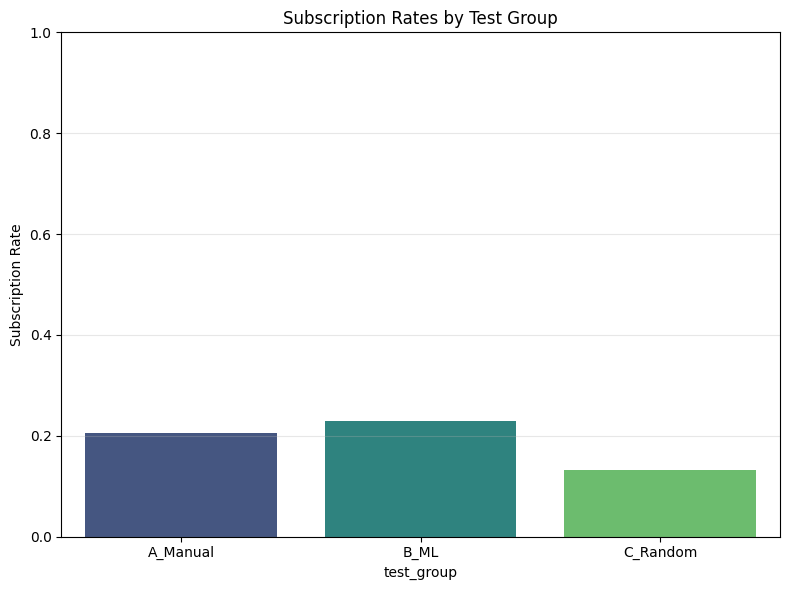

   ✅ Saved subscription rates plot: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/reports/segment/ab_test/subscription_rates.png
[VISUALIZATION] Plotting spending increase...


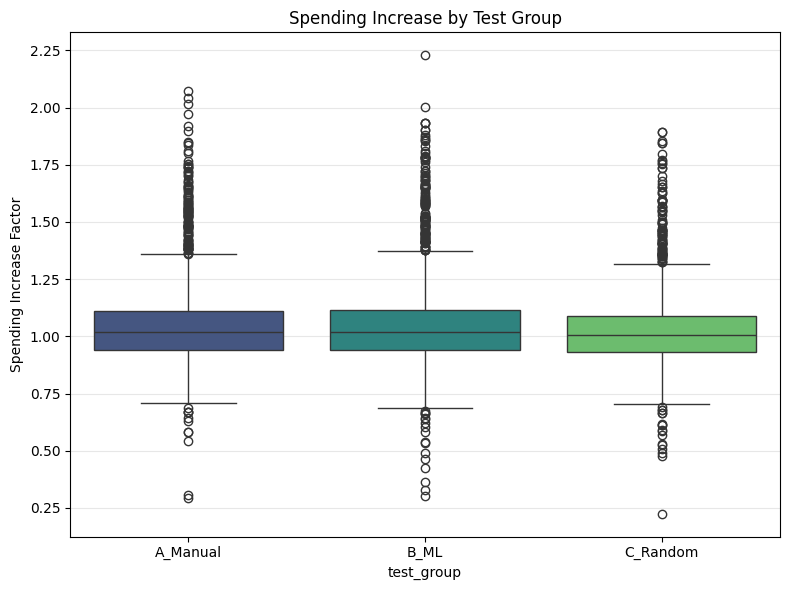

   ✅ Saved spending increase plot: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/reports/segment/ab_test/spending_increase.png
[VISUALIZATION] Plotting engagement scores...


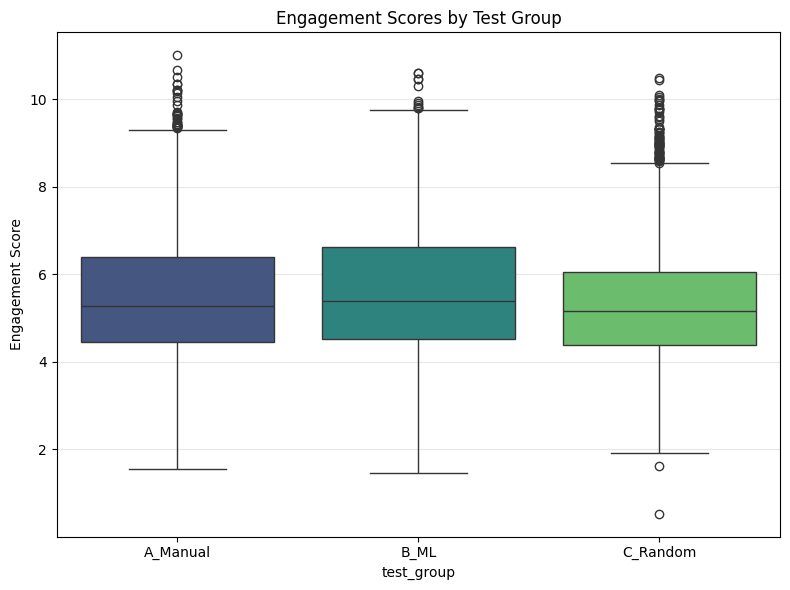

   ✅ Saved engagement scores plot: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/reports/segment/ab_test/engagement_scores.png
   ✅ A/B test report generated
[EXPORT] Saving test results to ab_test_results.csv...
   ✅ Saved test results to: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/data/csv/processed/segment/ab_test/ab_test_results.csv

✅ A/B test analysis completed!


In [13]:
# Run all tests
results = tester.run_complete_analysis()